# 基本使用

In [23]:
import pandas as pd        
from pygam import LogisticGAM
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
#load the breast cancer data set
data = load_breast_cancer()
#keep first 6 features only
df = pd.DataFrame(data.data, columns=data.feature_names)[['mean radius', 'mean texture', 'mean perimeter', 'mean area','mean smoothness', 'mean compactness']]
target_df = pd.Series(data.target)
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400


In [24]:
X = df[['mean radius', 'mean texture', 'mean perimeter', 'mean area','mean smoothness', 'mean compactness']]
y = target_df
#Fit a model with the default parameters
gam = LogisticGAM().fit(X, y)
gam

LogisticGAM(callbacks=[Deviance(), Diffs(), Accuracy()], 
   fit_intercept=True, max_iter=100, 
   terms=s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + intercept, 
   tol=0.0001, verbose=False)

In [25]:
gam.summary()

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     19.4476
Link Function:                        LogitLink Log Likelihood:                                   -54.0256
Number of Samples:                          569 AIC:                                              146.9464
                                                AICc:                                             148.5483
                                                UBRE:                                               2.2856
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.8562
Feature Function                  Lam

C:\Users\WENDY\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  """Entry point for launching an IPython kernel.


In [26]:
gam.accuracy(X, y)

0.9560632688927944

In [27]:
def plot_feature_plot(gam):
    plt.rcParams['figure.figsize'] = (28, 8)
    fig, axs = plt.subplots(1, len(data.feature_names[0:6]))
    titles = data.feature_names

    for i, ax in enumerate(axs):
        XX = gam.generate_X_grid(term=i)
        ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
        ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX,   width=.95)[1], c='r', ls='--')
        ax.set_title(titles[i])
    plt.show()

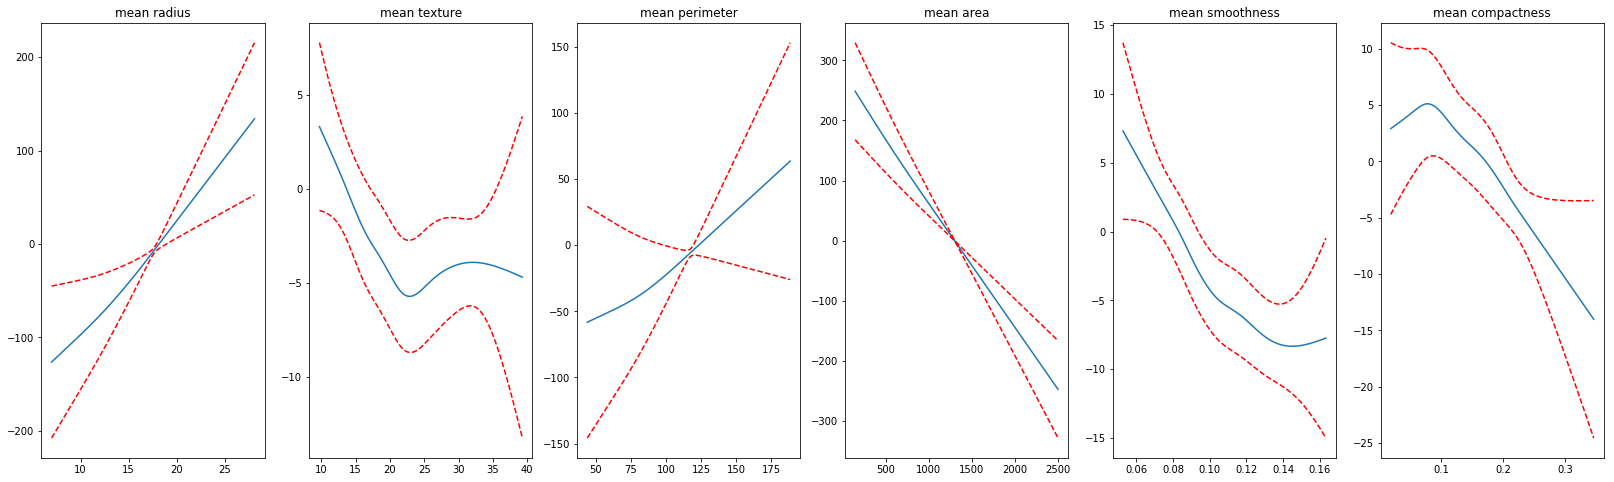

In [28]:
plot_feature_plot(gam)

# 相关参数

In [29]:
lambda_ = 0.01
n_splines = [25, 6, 25, 25, 6, 4] 
constraints = None
gam = LogisticGAM(constraints=constraints, 
                  lam=lambda_,
                  n_splines=n_splines).fit(X, y)

C:\Users\WENDY\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\WENDY\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\WENDY\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)


In [30]:
gam.accuracy(X, y)

0.9666080843585237

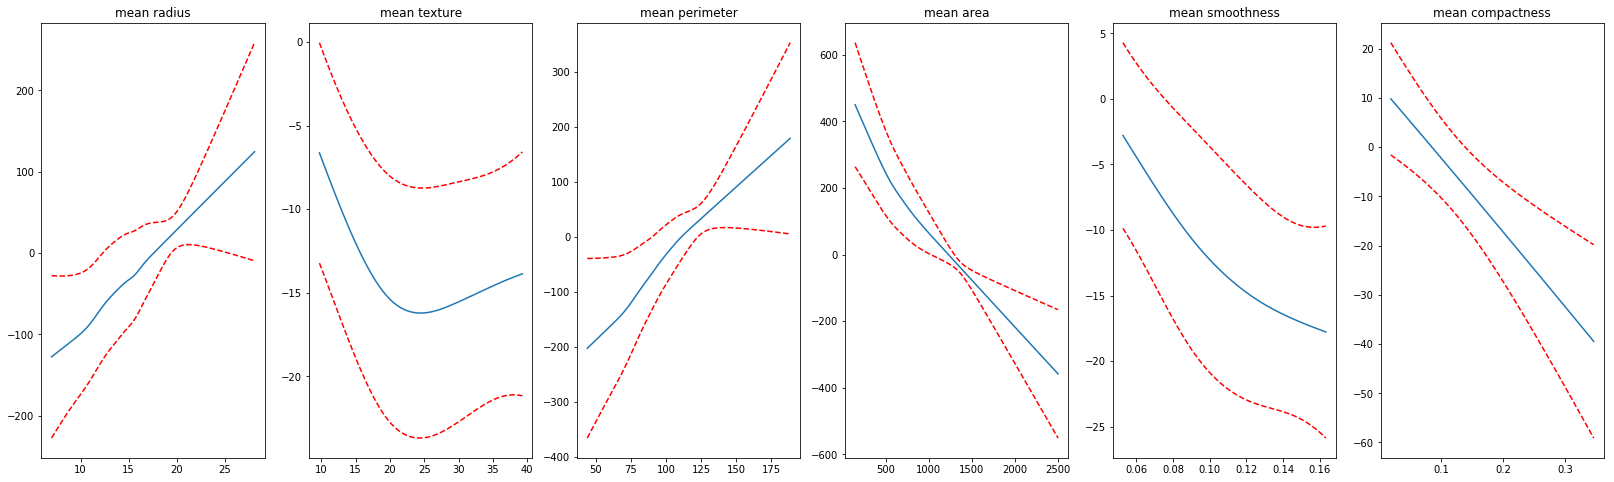

In [31]:
plot_feature_plot(gam)

# 通过gridsearch()来自动调参

In [32]:
gam = LogisticGAM().gridsearch(X.values, y)

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--C:\Users\WENDY\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\WENDY\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\WENDY\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:   0:00:02C:\Users\WENDY\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\WENDY\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\WENDY\Anaconda3\l

### 三种方法

In [58]:
# 1. via cartesian product by specifying the grid as a list. our grid search will consider 11 ** 4 points:
lam = np.logspace(-3, 3, 2)
lams = [lam] * 6
print(f'lams: {lams}')
gam.gridsearch(X.values, y, lam=lams)
# 计算次数为 2**6

N/A% (0 of 64) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

lams: [array([1.e-03, 1.e+03]), array([1.e-03, 1.e+03]), array([1.e-03, 1.e+03]), array([1.e-03, 1.e+03]), array([1.e-03, 1.e+03]), array([1.e-03, 1.e+03])]


C:\Users\WENDY\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\WENDY\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\WENDY\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
  1% (1 of 64) |                         | Elapsed Time: 0:00:00 ETA:   0:00:14C:\Users\WENDY\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\WENDY\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\WENDY\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered 

 17% (11 of 64) |####                    | Elapsed Time: 0:00:03 ETA:   0:00:16C:\Users\WENDY\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\WENDY\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\WENDY\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
 18% (12 of 64) |####                    | Elapsed Time: 0:00:03 ETA:   0:00:15C:\Users\WENDY\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\WENDY\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\WENDY\Anaconda3\l

C:\Users\WENDY\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\WENDY\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
C:\Users\WENDY\Anaconda3\lib\site-packages\pygam\links.py:134: RuntimeWarning: invalid value encountered in true_divide
  return dist.levels * elp / (elp + 1)
C:\Users\WENDY\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: overflow encountered in square
  self.distribution.V(mu=mu) *
C:\Users\WENDY\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: overflow encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
 35% (23 of 64) |########                | Elapsed Time: 0:00:06 ETA:   0:00:10C:\Users\WENDY\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  re

C:\Users\WENDY\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: overflow encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\WENDY\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: overflow encountered in square
  self.distribution.V(mu=mu) *
 54% (35 of 64) |#############           | Elapsed Time: 0:00:08 ETA:   0:00:05C:\Users\WENDY\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\WENDY\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\WENDY\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
 56% (36 of 64) |#############           | Elapsed Time: 0:00:08 ETA:   0:00:05C:\Users\WENDY\Anaconda3\lib\site-packa

 75% (48 of 64) |##################      | Elapsed Time: 0:00:11 ETA:   0:00:03C:\Users\WENDY\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\WENDY\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\WENDY\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
 76% (49 of 64) |##################      | Elapsed Time: 0:00:11 ETA:   0:00:02C:\Users\WENDY\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\WENDY\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\WENDY\Anaconda3\l

LogisticGAM(callbacks=[Deviance(), Diffs(), Accuracy()], 
   fit_intercept=True, max_iter=100, 
   terms=s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + intercept, 
   tol=0.0001, verbose=False)

In [39]:
gam

LogisticGAM(callbacks=[Deviance(), Diffs(), Accuracy()], 
   fit_intercept=True, max_iter=100, 
   terms=s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + intercept, 
   tol=0.0001, verbose=False)

In [ ]:
# 2. directly by specifying the grid as a np.ndarray. This is useful for when the dimensionality of the search space is very large, and we would prefer to execute a randomized search:

In [55]:
lams = np.exp(np.random.random((50, 6)) * 6 - 3)
print(f'lams: {lams}')
gam.gridsearch(X.values, y, lam=lams)

  2% (1 of 50) |                         | Elapsed Time: 0:00:00 ETA:   0:00:05

lams: [[ 4.44528265 14.17317359  0.10301311  0.18817584 12.4529697   3.47205651]
 [ 5.7900718   0.07098494  0.05072777  1.38044549  3.4539335   0.07745304]
 [17.50639675  0.18912258  4.97028317  9.09854337  4.59518987  0.24472444]
 [ 0.16506021 17.15857206  4.15050264  1.1845907   0.34481647 16.51887932]
 [ 7.57920291  0.38009466  0.55228784  1.54596502  5.30492092  0.07200305]
 [ 1.74314937  7.75144002  2.00106416  7.20033021  1.48939497  0.13800654]
 [ 0.21647233  0.29768181  1.12208834  0.11496587 13.54870668  7.99588885]
 [ 0.82127273  0.32352221  1.05525747  2.70101864  9.54680709  0.37504537]
 [ 0.66623837  1.27651085 17.27188806  0.67923279  0.67410758  0.61445507]
 [ 0.14763762  1.08791715  8.00681633  0.18134215  9.48065523  1.49657972]
 [ 2.28838686  0.16075321 18.21910161  0.05201918  1.98747824  0.35062996]
 [ 0.06298068  4.77544611  3.47283619  4.51841948 13.22733736  0.05786327]
 [ 1.45776596 18.59413528 10.97925747  1.65014191 10.47989658  0.08178621]
 [ 0.98057183  0.23

100% (50 of 50) |########################| Elapsed Time: 0:00:06 Time:  0:00:06


LogisticGAM(callbacks=[Deviance(), Diffs(), Accuracy()], 
   fit_intercept=True, max_iter=100, 
   terms=s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + intercept, 
   tol=0.0001, verbose=False)

In [51]:
# 3. copying grids for parameters with multiple dimensions. if we specify a 1D np.ndarray for lam, we are implicitly testing the space where all points have the same value

In [52]:
gam.gridsearch(X.values, y, lam=np.logspace(-3, 3, 11))

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--C:\Users\WENDY\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\WENDY\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\WENDY\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:   0:00:02C:\Users\WENDY\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\WENDY\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\WENDY\Anaconda3\l

LogisticGAM(callbacks=[Deviance(), Diffs(), Accuracy()], 
   fit_intercept=True, max_iter=100, 
   terms=s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + intercept, 
   tol=0.0001, verbose=False)

In [53]:
lam = np.logspace(-3, 3, 11)
print(f'lam: {lam}')
lams = np.array([lam] * 6)
print(f'lams: {lams}')
gam.gridsearch(X.values, y, lam=lams)

lam: [1.00000000e-03 3.98107171e-03 1.58489319e-02 6.30957344e-02
 2.51188643e-01 1.00000000e+00 3.98107171e+00 1.58489319e+01
 6.30957344e+01 2.51188643e+02 1.00000000e+03]
lams: [[1.00000000e-03 3.98107171e-03 1.58489319e-02 6.30957344e-02
  2.51188643e-01 1.00000000e+00 3.98107171e+00 1.58489319e+01
  6.30957344e+01 2.51188643e+02 1.00000000e+03]
 [1.00000000e-03 3.98107171e-03 1.58489319e-02 6.30957344e-02
  2.51188643e-01 1.00000000e+00 3.98107171e+00 1.58489319e+01
  6.30957344e+01 2.51188643e+02 1.00000000e+03]
 [1.00000000e-03 3.98107171e-03 1.58489319e-02 6.30957344e-02
  2.51188643e-01 1.00000000e+00 3.98107171e+00 1.58489319e+01
  6.30957344e+01 2.51188643e+02 1.00000000e+03]
 [1.00000000e-03 3.98107171e-03 1.58489319e-02 6.30957344e-02
  2.51188643e-01 1.00000000e+00 3.98107171e+00 1.58489319e+01
  6.30957344e+01 2.51188643e+02 1.00000000e+03]
 [1.00000000e-03 3.98107171e-03 1.58489319e-02 6.30957344e-02
  2.51188643e-01 1.00000000e+00 3.98107171e+00 1.58489319e+01
  6.3095

ValueError: lam grid should have 6 columns, but found grid with 6 columns

# 完整流程

In [11]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
gam = LogisticGAM().gridsearch(X_train.values, y_train)

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--C:\Users\WENDY\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\WENDY\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
C:\Users\WENDY\Anaconda3\lib\site-packages\pygam\pygam.py:614: RuntimeWarning: invalid value encountered in greater_equal
  mask = (np.abs(weights) >= np.sqrt(EPS)) * np.isfinite(weights)
C:\Users\WENDY\Anaconda3\lib\site-packages\pygam\links.py:134: RuntimeWarning: invalid value encountered in true_divide
  return dist.levels * elp / (elp + 1)
C:\Users\WENDY\Anaconda3\lib\site-packages\pygam\links.py:149: RuntimeWarning: overflow encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
C:\Users\WENDY\Anaconda3\lib\site-packages\pygam\pygam.py:592: RuntimeWarning: overflow encountered 

In [12]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
predictions = gam.predict(X_test)
print("Accuracy: {} ".format(accuracy_score(y_test, predictions)))
probas = gam.predict_proba(X_test)      
print("Log Loss: {} ".format(log_loss(y_test, probas)))

Accuracy: 0.9574468085106383 
Log Loss: 0.1163122543453866 


# 测试不同参数-回归

In [13]:
from sklearn.datasets import load_boston
from pygam import LinearGAM

boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
target_df = pd.Series(boston.target)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [14]:
X = df
y = target_df
gam = LinearGAM(n_splines=10).gridsearch(X.values, y)
gam.summary()

100% (11 of 11) |########################| Elapsed Time: 0:00:01 Time:  0:00:01


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     83.3323
Link Function:                     IdentityLink Log Likelihood:                                 -1653.0816
Number of Samples:                          506 AIC:                                             3474.8279
                                                AICc:                                            3509.0415
                                                GCV:                                               14.1634
                                                Scale:                                             10.0384
                                                Pseudo R-Squared:                                   0.9007
Feature Function                  Lam

C:\Users\WENDY\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  after removing the cwd from sys.path.


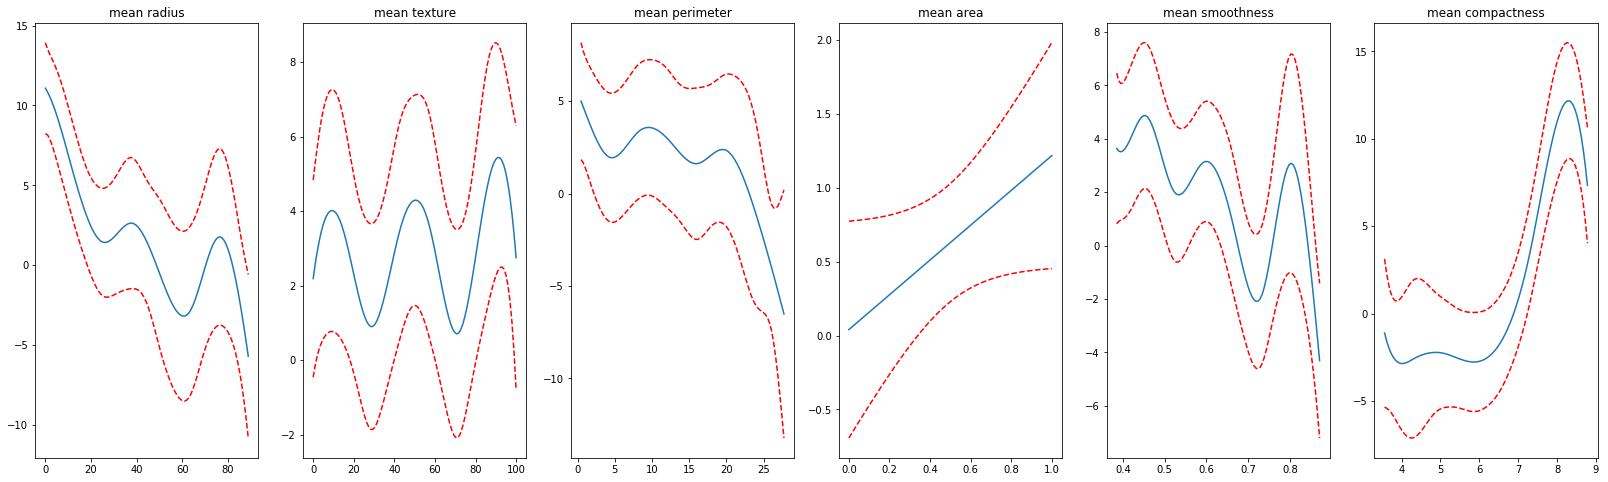

In [15]:
plot_feature_plot(gam)

### 惩罚项


lambda_: 0.01


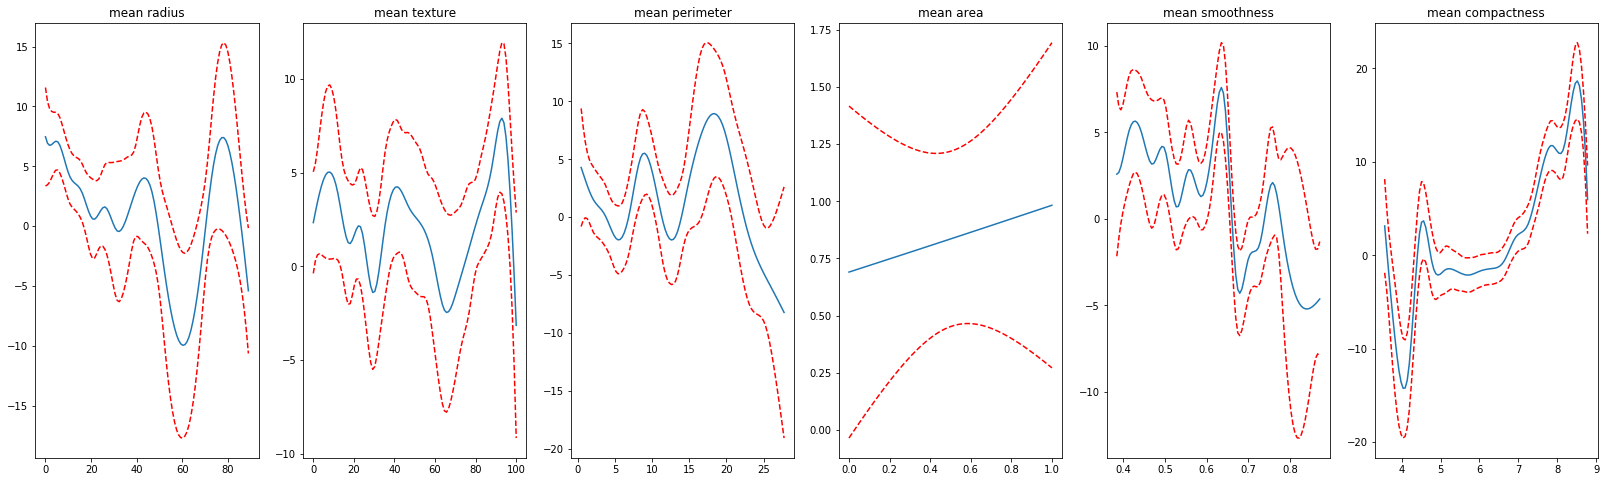


lambda_: 0.1


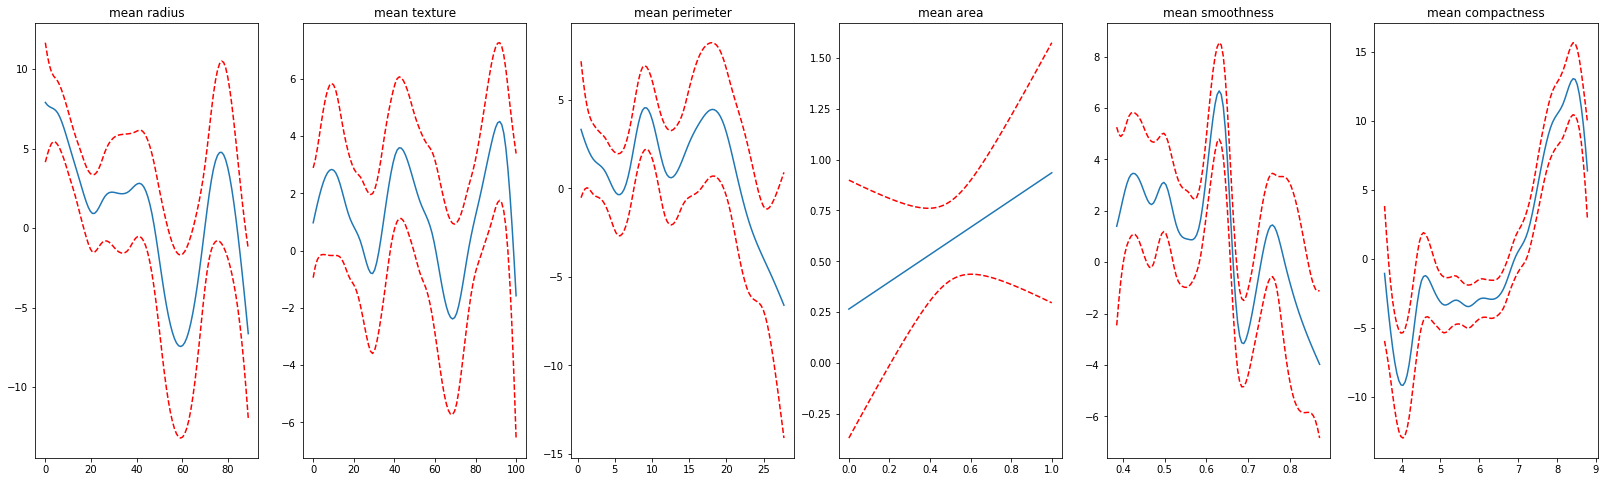


lambda_: 1


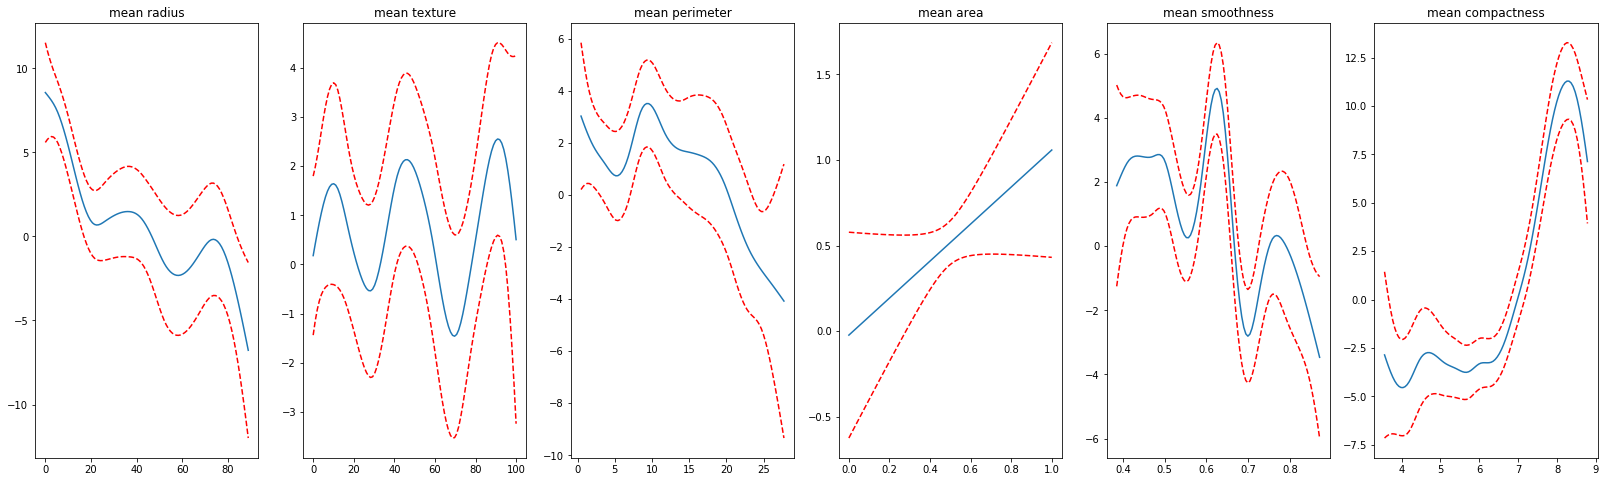


lambda_: 10


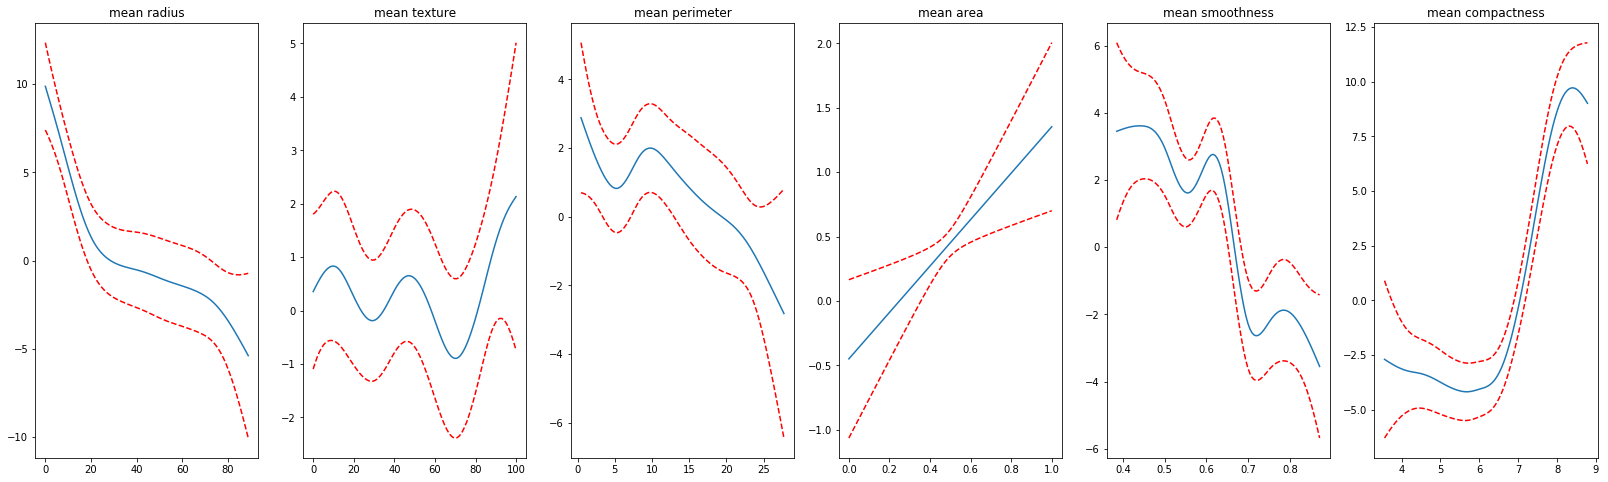


lambda_: 100


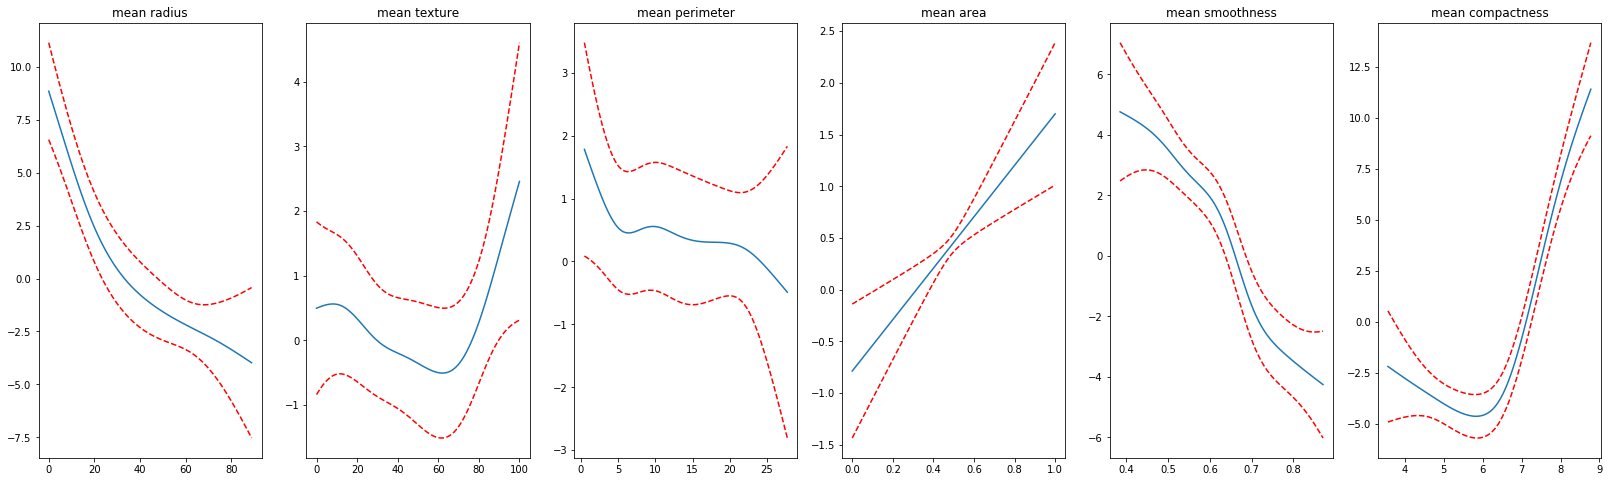

In [17]:
lambda_list = [0.01, 0.1, 1, 10, 100]
for lambda_ in lambda_list:
    constraints = None
    gam = LinearGAM(constraints=constraints, 
                    lam=lambda_).fit(X.values, y)
    print(f'\nlambda_: {lambda_}')
    plot_feature_plot(gam)
#     gam.score(X.values, y)

### 样条函数的数量


lambda_: [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]


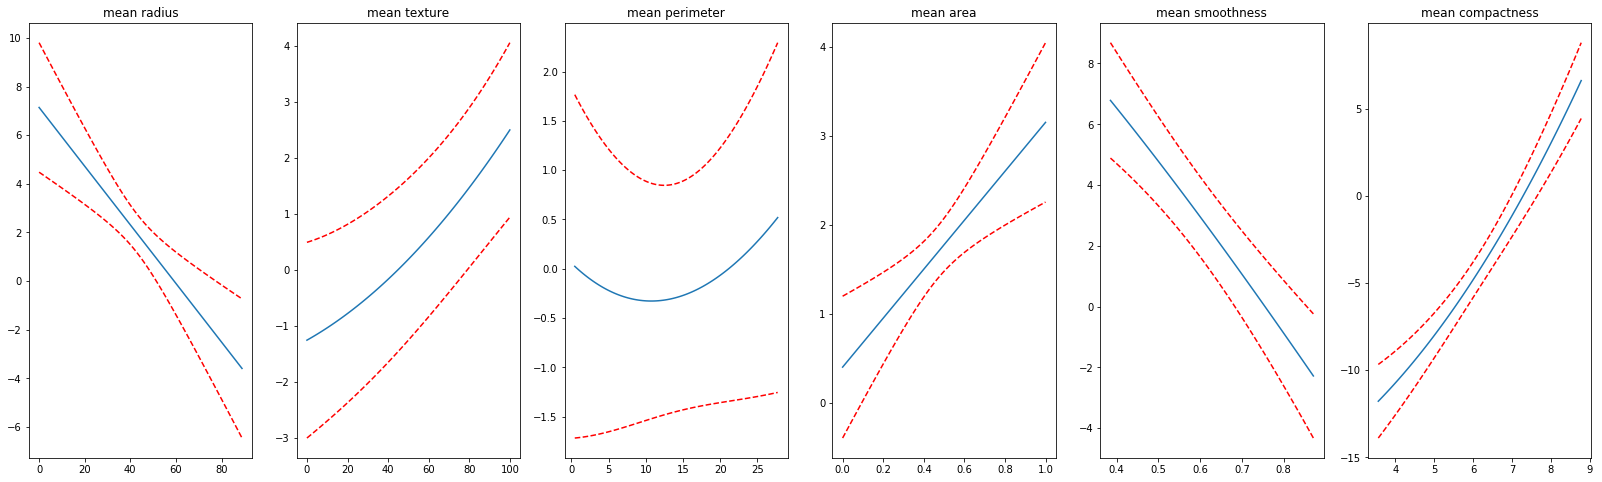


lambda_: [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]


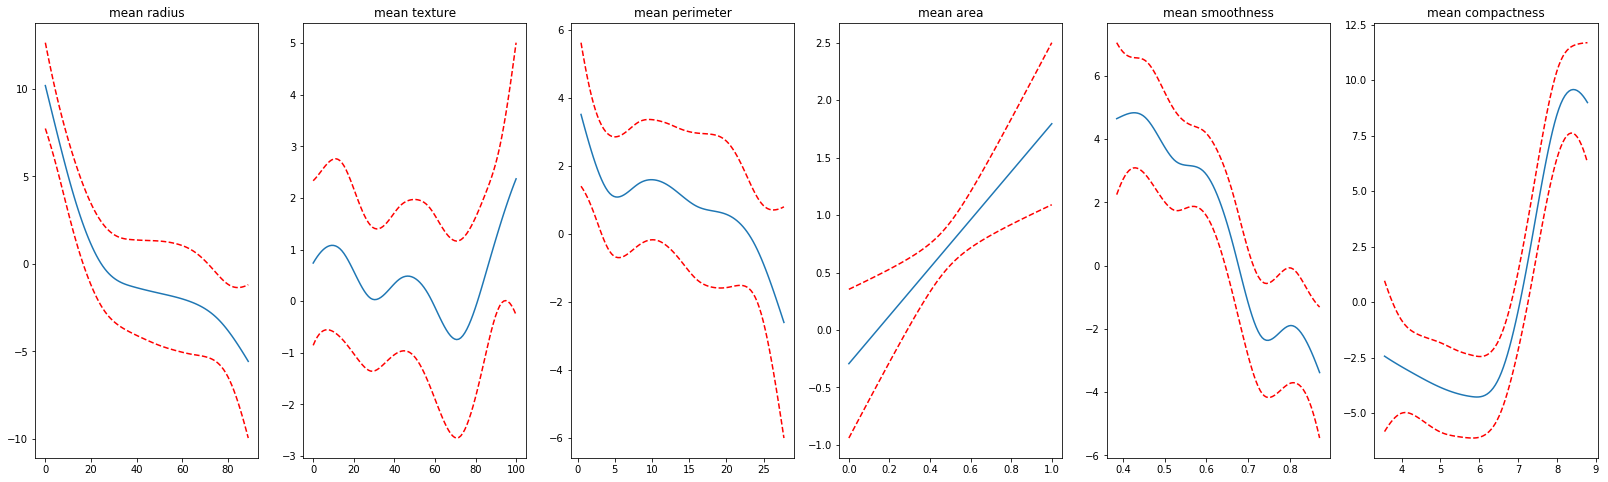


lambda_: [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]


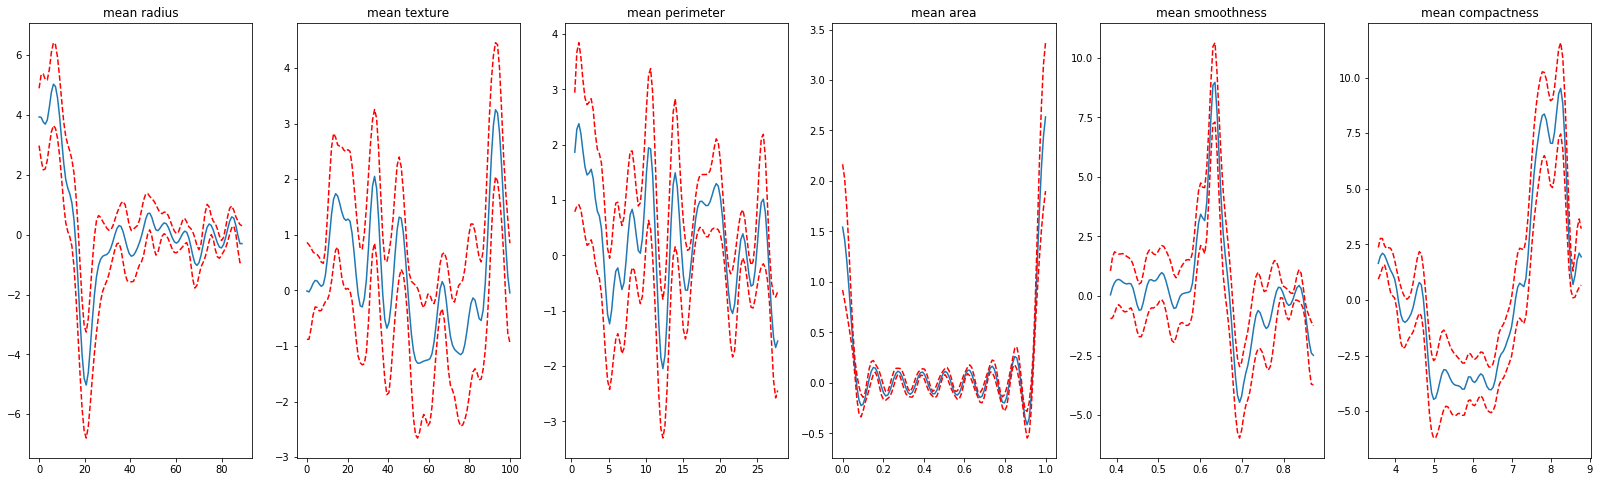


lambda_: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]


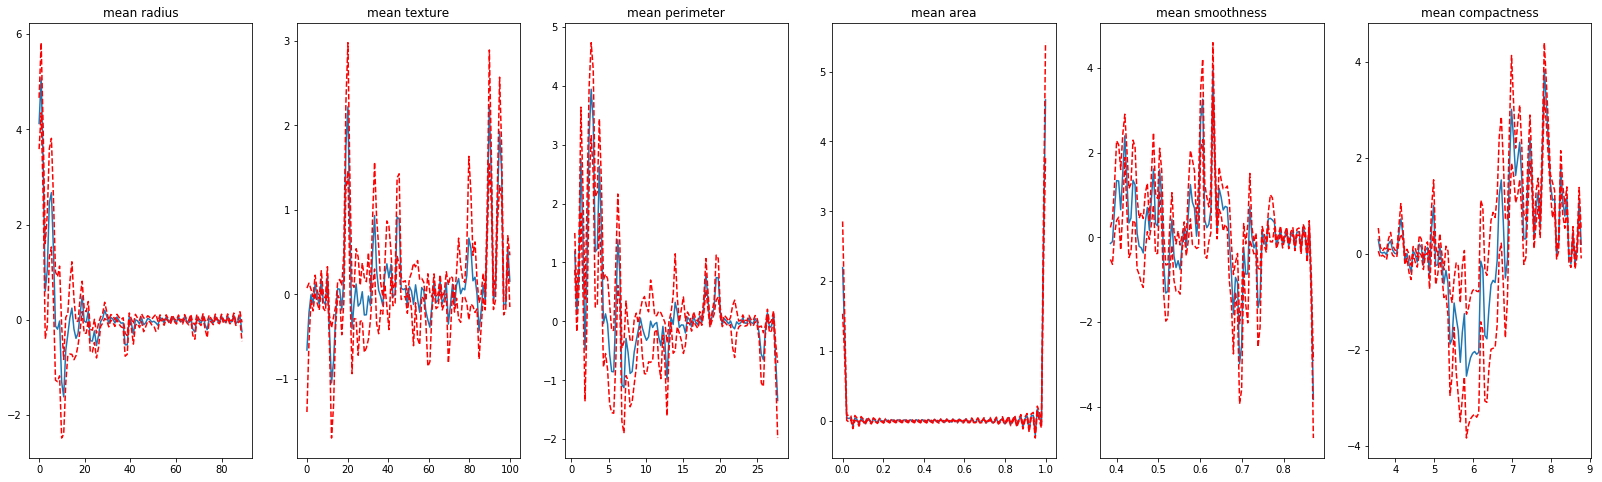

In [18]:
n_splines_list = [[4]*13, [10]*13, [50]*13, [100]*13]
for n_splines in n_splines_list:
    constraints = None
    gam = LinearGAM(constraints = constraints, 
                    n_splines = n_splines).fit(X.values, y)
    print(f'\nlambda_: {n_splines}')
    plot_feature_plot(gam)

### 测试约束


constraints: convex


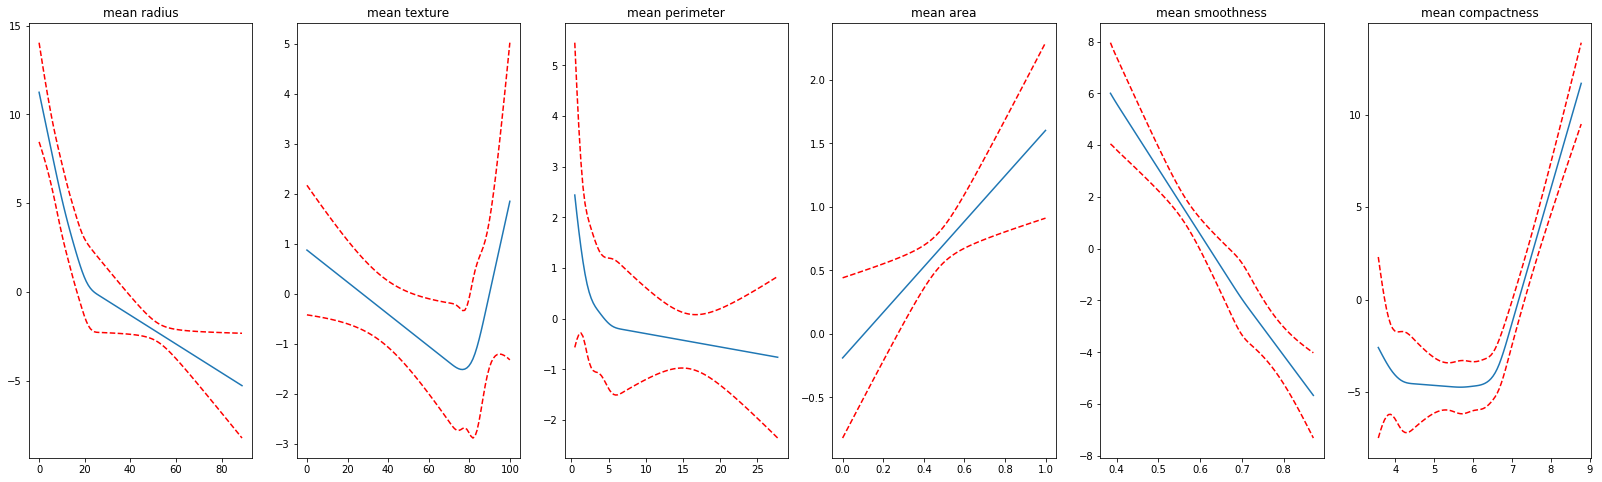


constraints: concave


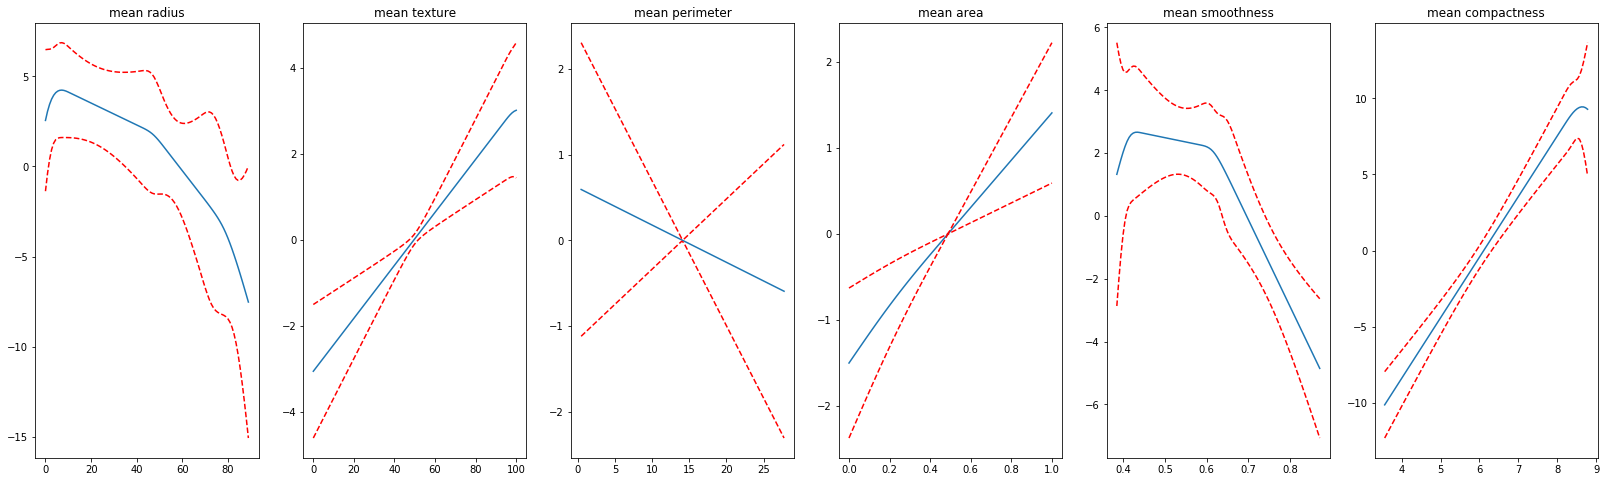


constraints: monotonic_inc


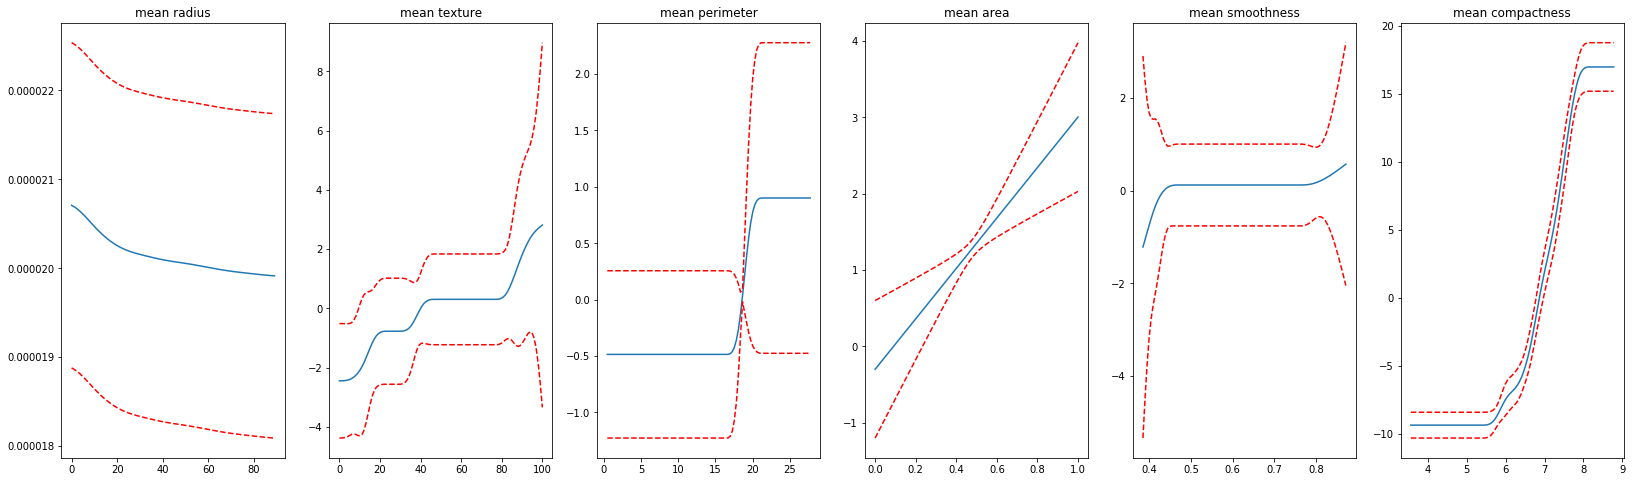


constraints: monotonic_dec


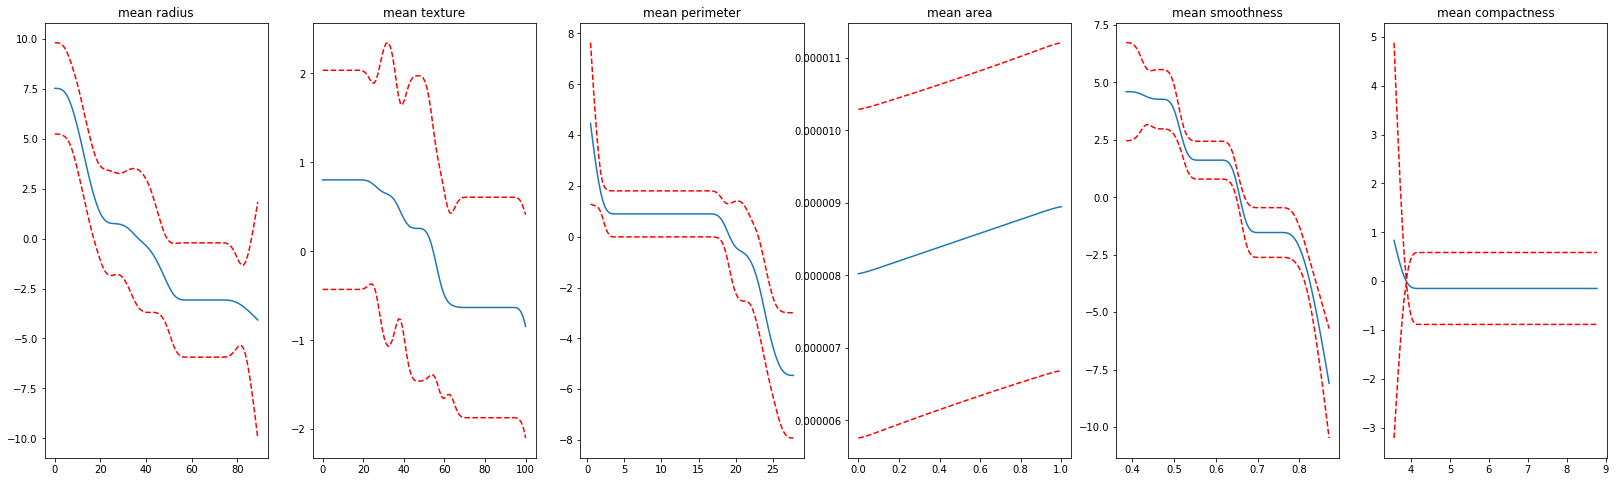


constraints: none


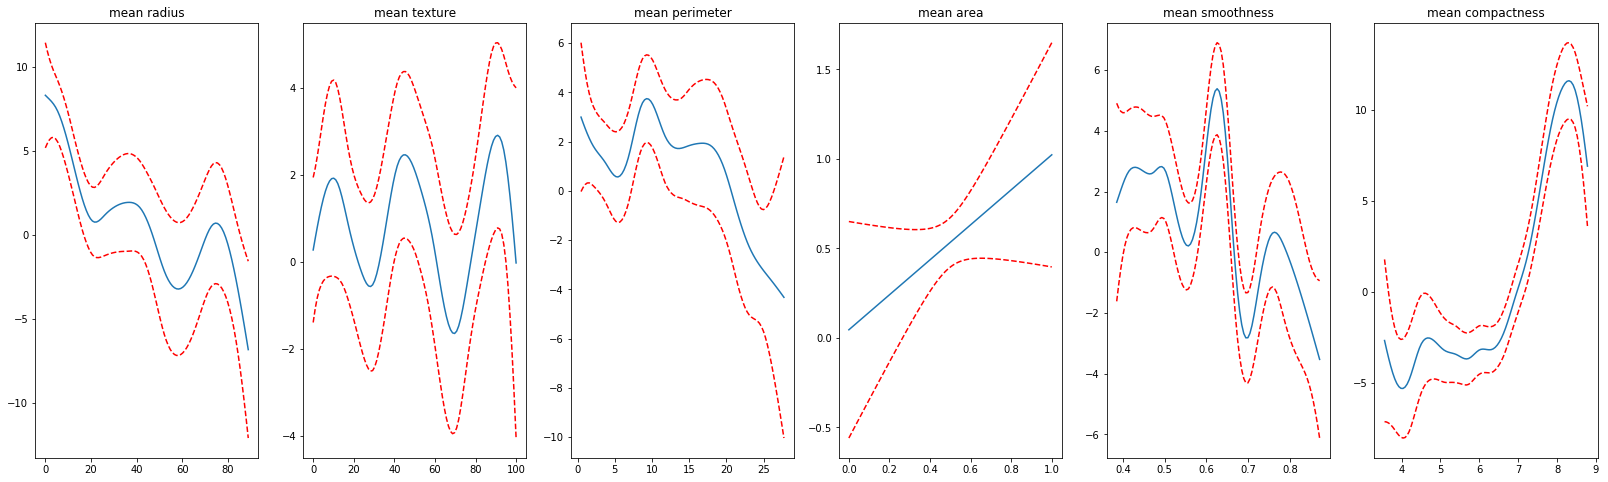

In [21]:
constraints_list = ['convex', 'concave', 'monotonic_inc', 'monotonic_dec', 'none']# circular
for constraints in constraints_list:
    gam = LinearGAM(constraints = constraints).fit(X.values, y)
    print(f'\nconstraints: {constraints}')
    plot_feature_plot(gam)